In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/co2_emissions (1).csv')
data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


#Exploratory Data Analysis

In [3]:
#Drop column with Fuel consumption in 'miles per gallon' since we will use 'liters per 100km' for the same.
data.drop('fuel_consumption_comb(mpg)', axis=1, inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 634.8+ KB


In [5]:
data.drop_duplicates().shape #duplicates rows are present

(6273, 11)

In [6]:
data.drop_duplicates(inplace=True) #remove duplicates
data.shape

(6273, 11)

In [7]:
data.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),co2_emissions
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000
mean,3.163000,5.620596,12.615591,9.073426,11.022111,251.247250
std,1.365294,1.846424,3.550572,2.277893,2.945028,59.235396
min,0.900000,3.000000,4.200000,4.000000,4.100000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,522.000000


In [8]:
categorical_cols = ["make", "model", "vehicle_class", "transmission", "fuel_type"]
numerical_cols = ["engine_size", "cylinders","fuel_consumption_city", "fuel_consumption_hwy", "fuel_consumption_comb(l/100km)", "co2_emissions",]

In [9]:
#Count unique values in each categorical column
for col in categorical_cols:
    print(f"'{col}':'{data[col].nunique()}'")

'make':'42'
'model':'2053'
'vehicle_class':'16'
'transmission':'5'
'fuel_type':'5'


## Visualization

<Axes: >

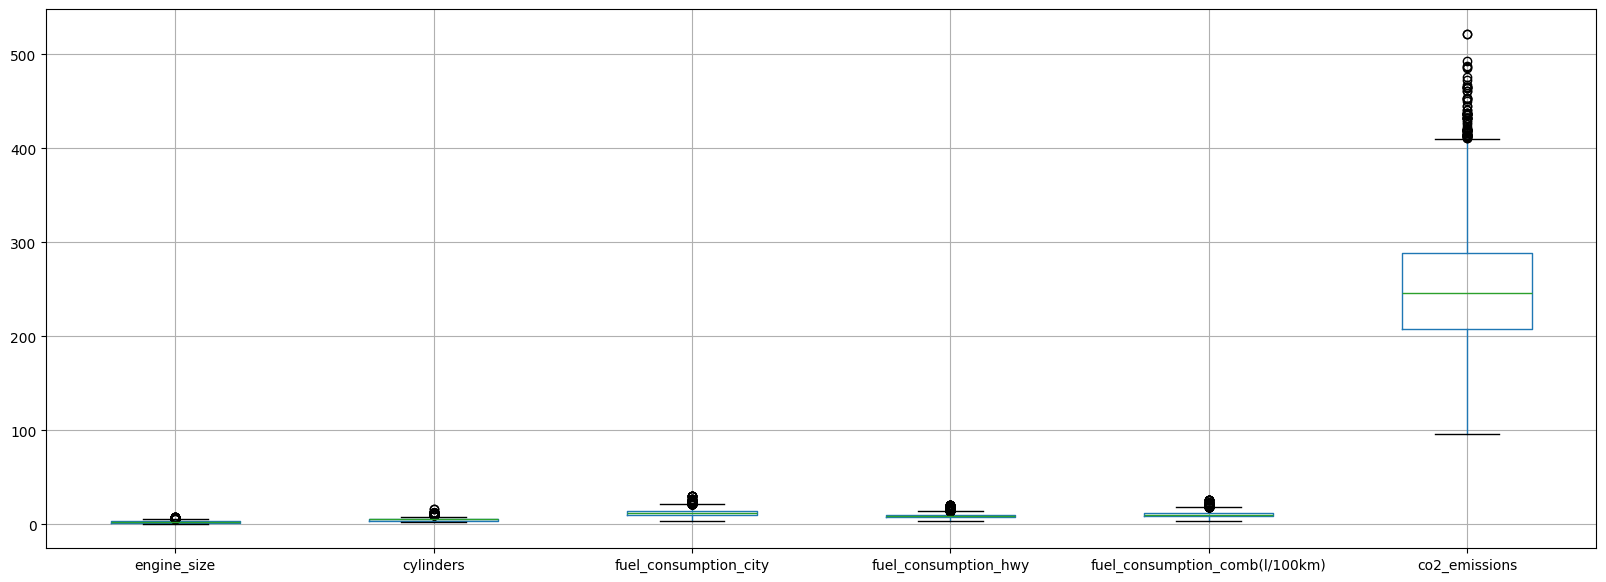

In [10]:
data.boxplot(figsize=(20,7))

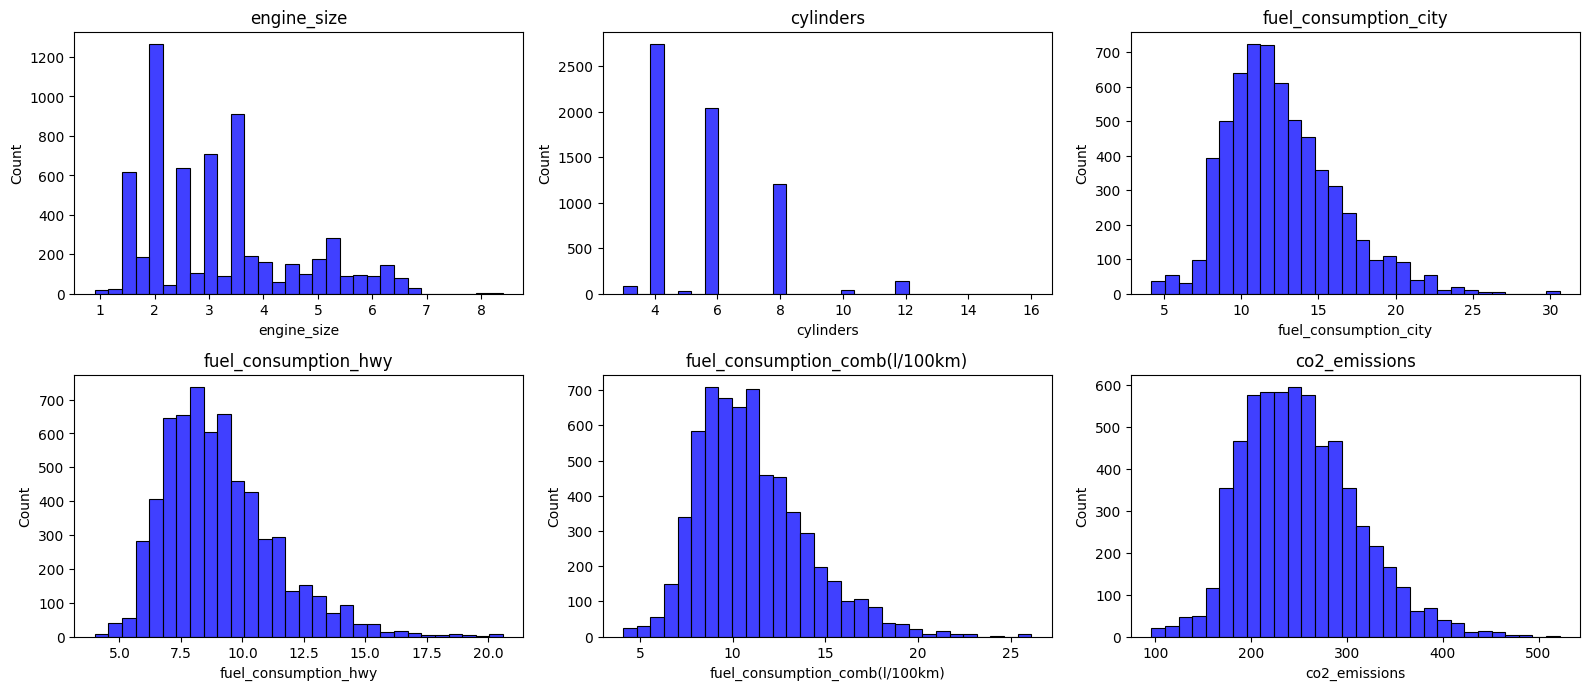

In [11]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], bins=30, color="blue")
    plt.title(col)
plt.tight_layout()
plt.show()

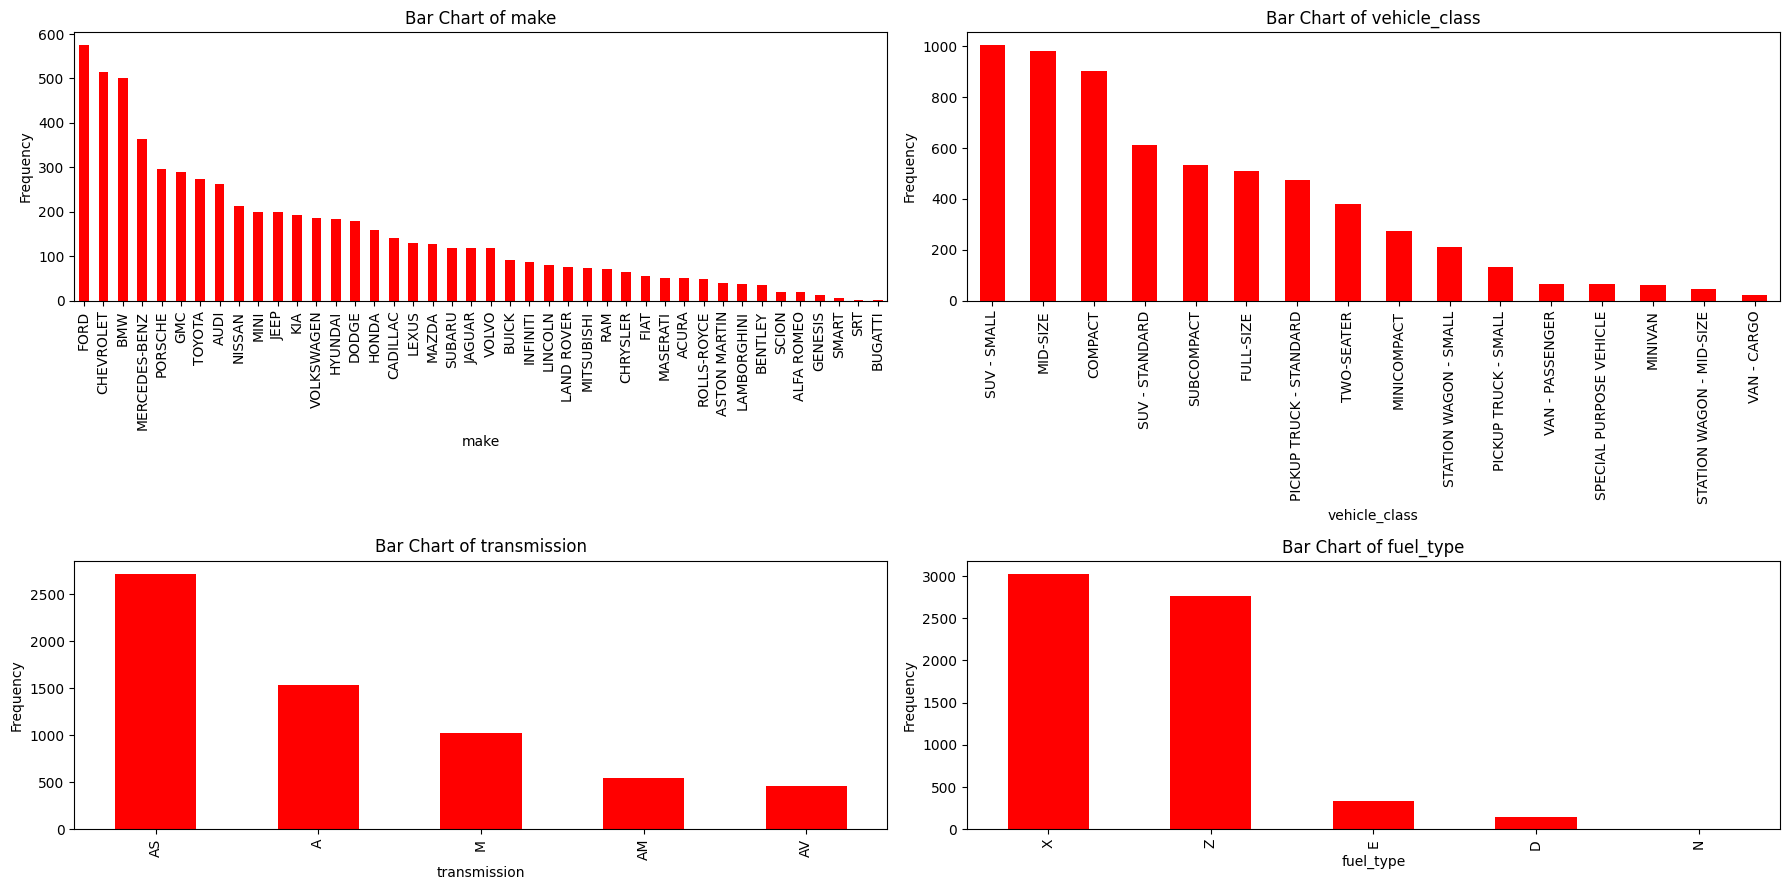

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(18, 9))
axes = axes.flatten()

for i, column in enumerate(["make", "vehicle_class", "transmission", "fuel_type"]):
    data[column].value_counts().plot(kind='bar', color='red', ax=axes[i])
    axes[i].set_title(f'Bar Chart of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

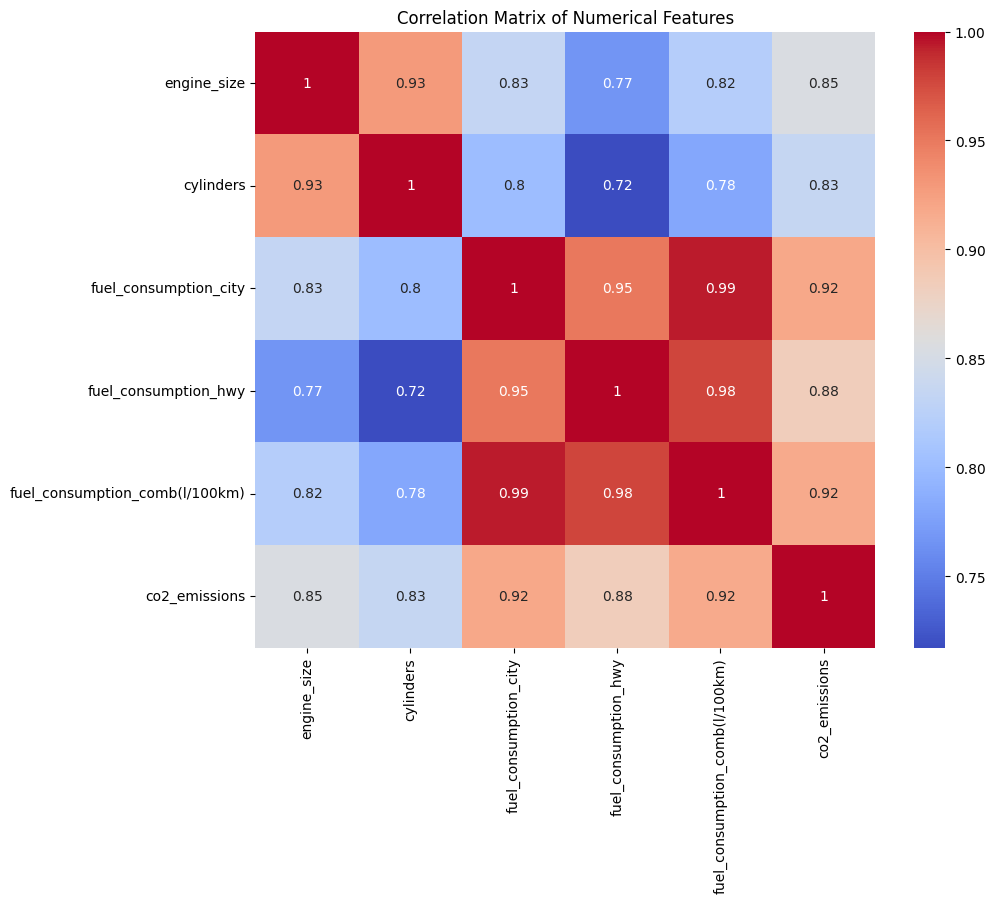

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

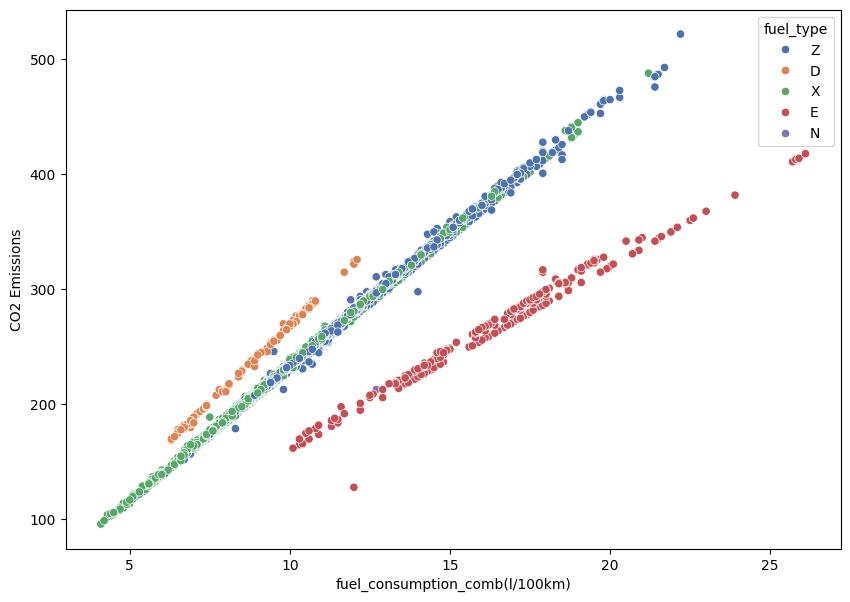

In [14]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data['fuel_consumption_comb(l/100km)'], y=data["co2_emissions"], hue=data["fuel_type"], palette="deep")
plt.xlabel('fuel_consumption_comb(l/100km)')
plt.ylabel("CO2 Emissions")
plt.show()

## Insights